##Car Sales Price Analysis & Insights

#Objective
As a data analyst for a national car reseller, I aim to uncover actionable insights about pricing, demand, and regional dynamics to inform strategic decisions.
This analysis explores the following business questions:

1. What vehicle attributes most strongly influence selling price?
2. Are there regional differences in resale prices for similar vehicles?
3. Is there an optimal age (year) range where vehicles retain the most value relative to their age?
4. Do automatic vs. manual transmissions affect selling price significantly?
5. At what mileage or condition “thresholds” do prices decline sharply?
6. Which states have the widest price ranges for similar cars, indicating price volatility?

In [5]:
# Mount Drive to upload local file "car_prices.csv"
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Load file and check content
df = pd.read_csv('/content/drive/My Drive/car_prices.csv')
df.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [8]:
# check missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


##EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [10]:
# Convert saledate to datetime
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)
df.info()

/tmp/ipython-input-10-2750125981.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          558837 non-null  int64              
 1   make          548536 non-null  object             
 2   model         548438 non-null  object             
 3   trim          548186 non-null  object             
 4   body          545642 non-null  object             
 5   transmission  493485 non-null  object             
 6   vin           558833 non-null  object             
 7   state         558837 non-null  object             
 8   condition     547017 non-null  float64            
 9   odometer      558743 non-null  float64            
 10  color         558088 non-null  object             
 11  interior      558088 non-null  object             
 12  seller        558837 non-null  object             
 13  mmr           558799 non-null  float64      

In [11]:
# Create `car_age` at time of sale column (saledate.year - year)

df['car_age'] = df['saledate'].dt.year - df['year']

# Verify: check summary and a few rows
print(df['car_age'].describe())
print(df[['year', 'saledate', 'car_age']].head())

count    558799.000000
mean          4.865220
std           3.944024
min          -1.000000
25%           2.000000
50%           3.000000
75%           7.000000
max          33.000000
Name: car_age, dtype: float64
   year                  saledate  car_age
0  2015 2014-12-16 04:30:00+00:00     -1.0
1  2015 2014-12-16 04:30:00+00:00     -1.0
2  2014 2015-01-14 20:30:00+00:00      1.0
3  2015 2015-01-28 20:30:00+00:00      0.0
4  2014 2014-12-18 04:30:00+00:00      0.0


In [12]:
# Fill missing categorical columns with "Unknown"

cat_cols = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']

for col in cat_cols:
    df[col] = df[col].fillna('Unknown')

# Verify
print(df[cat_cols].isnull().sum())

make            0
model           0
trim            0
body            0
transmission    0
color           0
interior        0
dtype: int64


In [13]:
# Fill missing numeric columns with median

num_cols = ['condition', 'odometer', 'mmr', 'sellingprice']

for col in num_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Verify
print(df.isnull().sum())

year             0
make             0
model            0
trim             0
body             0
transmission     0
vin              4
state            0
condition        0
odometer         0
color            0
interior         0
seller           0
mmr              0
sellingprice     0
saledate        38
car_age         38
dtype: int64


In [14]:
# Drop rows where `saledate` is still null (failed to parse)
df = df.dropna(subset=['saledate'])

# Optional: Verify
print(df.isnull().sum())

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
car_age         0
dtype: int64


In [15]:
df.shape

(558799, 17)

In [16]:
# Remove unrealistic records
# Criteria: sellingprice ≤ 100 OR odometer ≤ 0 OR odometer > 1,000,000

df = df[(df['sellingprice'] > 100) & (df['odometer'] > 0) & (df['odometer'] <= 1_000_000)]

# Verify
print(df.shape)

(558776, 17)


In [17]:
# Reset index

df = df.reset_index(drop=True)

# Verify
print(df.head())
print(df.index)

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors ameri

##Univariate EDA!

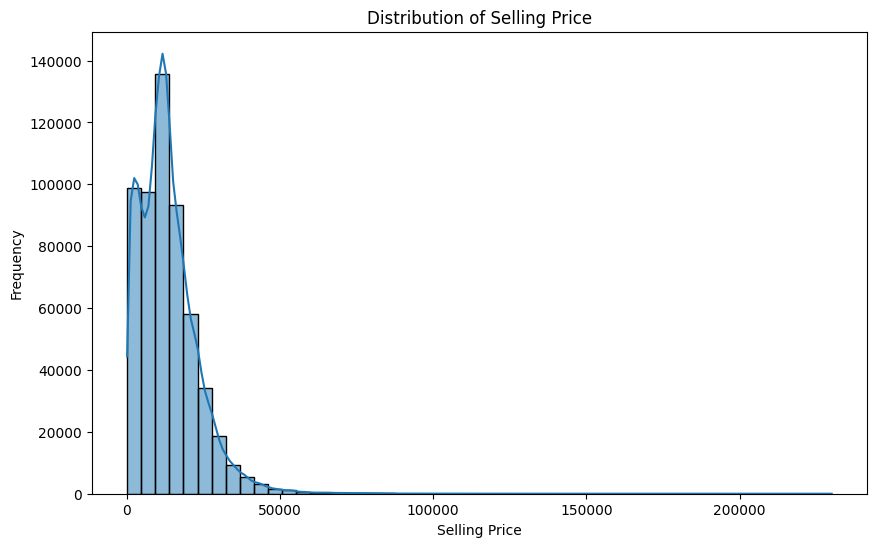

In [18]:
#Selling price distribution
plt.figure(figsize=(10,6))
sns.histplot(df['sellingprice'], bins=50, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

* The distribution of selling prices is right-skewed (positively skewed), with the majority of cars sold below 20,000.
* There is a clear peak around 10,000-15,000, which likely reflects the sweet spot for used car prices in this dataset.
* A long tail extends to high prices (over 100,000), indicating a small number of luxury or high-end vehicles.
* This suggests the dataset primarily covers mid-market vehicles, with fewer premium vehicles in inventory.

---



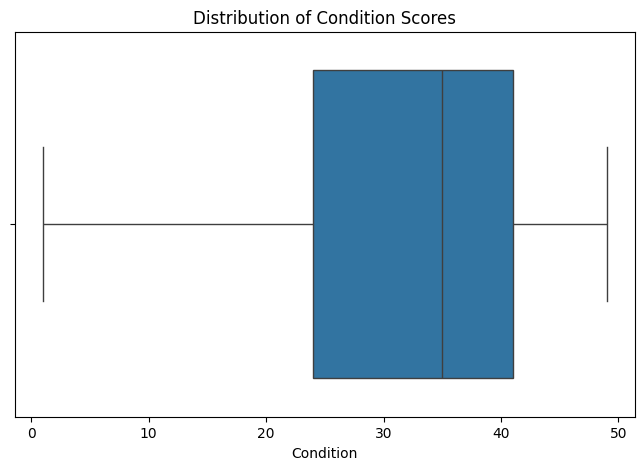

In [19]:
#Condition distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=df['condition'])
plt.title('Distribution of Condition Scores')
plt.xlabel('Condition')
plt.show()

* The condition scores appear to be distributed across the entire scale, roughly between 0 and 50.

* Most vehicles cluster in the mid to upper range of condition (around 30–45), suggesting that the majority of inventory is in fair-to-good condition.

* There are vehicles at the extreme low end (~0), likely representing salvage, parts, or very poor-condition vehicles — a small proportion of the data.

* There are no clear outliers beyond the natural bounds of the condition scale.
This implies that the seller operates across a broad spectrum of vehicle conditions, but focuses inventory more on mid-to-good condition vehicles, which is consistent with maximizing resale value.

---



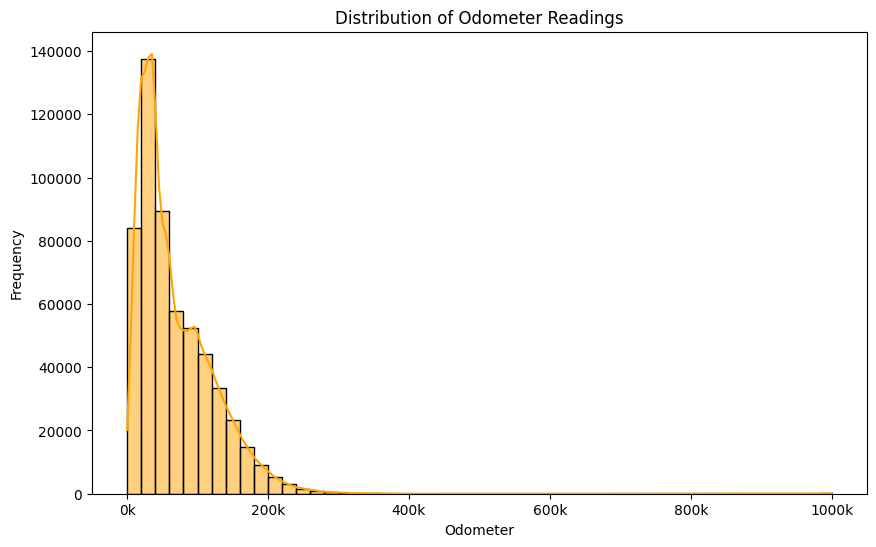

In [20]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10,6))
sns.histplot(df['odometer'], bins=50, kde=True, color='orange')
plt.title('Distribution of Odometer Readings')
plt.xlabel('Odometer')
plt.ylabel('Frequency')

# Format x-axis in thousands
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.show()


* The odometer distribution shows a strong right skew, typical for mileage data.

* The majority of vehicles have mileage between 20k and 100k miles, with the most common range around 40k–60k miles.

* There are a significant number of vehicles under 20k miles, likely representing newer or lightly used vehicles.

* High-mileage vehicles above 200k miles are rare but present, which might indicate trade-ins or older fleet vehicles.

* Extremely high-mileage vehicles (>500k) are virtually non-existent, showing reasonable quality control in inventory.

---




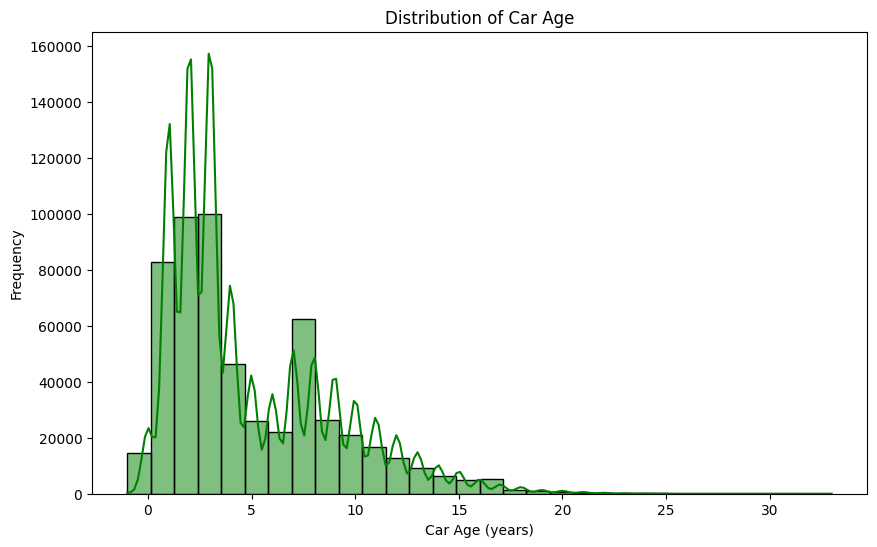

In [21]:
#Car age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['car_age'], bins=30, kde=True, color='green')
plt.title('Distribution of Car Age')
plt.xlabel('Car Age (years)')
plt.ylabel('Frequency')
plt.show()

* The distribution of car_age is right-skewed, with the majority of vehicles being relatively young.

* Most cars are 0–5 years old, peaking around 2–3 years — this aligns with common lease returns and trade-ins.

* There is a noticeable tail of older vehicles, with a small proportion exceeding 10 years of age.

* Very old vehicles (>20 years) are extremely rare in the inventory.


---



Action: The inventory appears to focus on late-model, younger vehicles — reinforcing the company’s strength in offering newer used cars that still carry significant value.

---



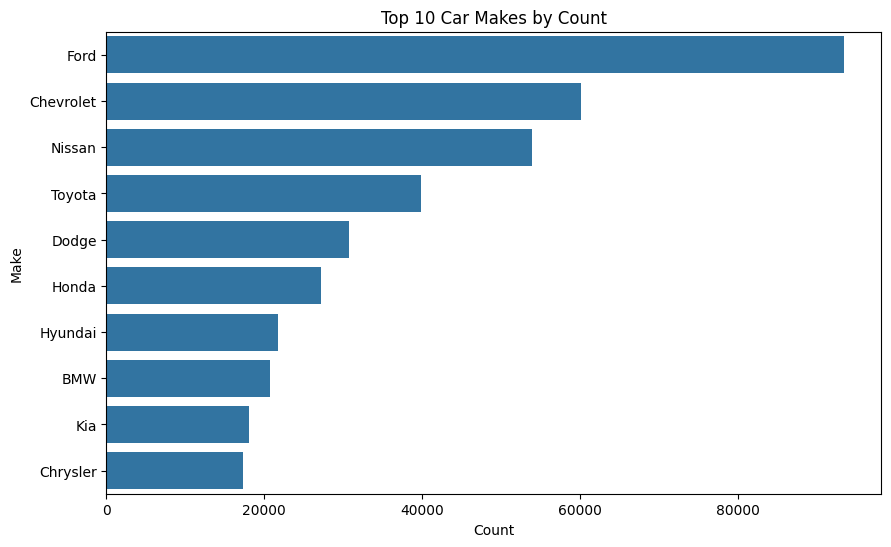

In [22]:
# TOP 10 makes
top_makes = df['make'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title('Top 10 Car Makes by Count')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

* The inventory is heavily concentrated in a few brands, with Ford clearly dominating at the top, followed by Chevrolet, Nissan, and Toyota.

* These top 4 brands alone account for the majority of vehicles in inventory, suggesting a focus on popular, mass-market vehicles.

* Other brands like Dodge, Honda, and Hyundai also feature prominently, reflecting demand for both domestic and imported models.

* Luxury brands such as BMW appear lower on the list but still within the top 10, indicating some presence in the higher-end segment.


---


Action: The strong concentration in Ford and Chevrolet may warrant deeper analysis into pricing strategies and customer preferences for these makes, while exploring opportunities to diversify inventory with underrepresented yet desirable brands.

---



##Bivariate EDA

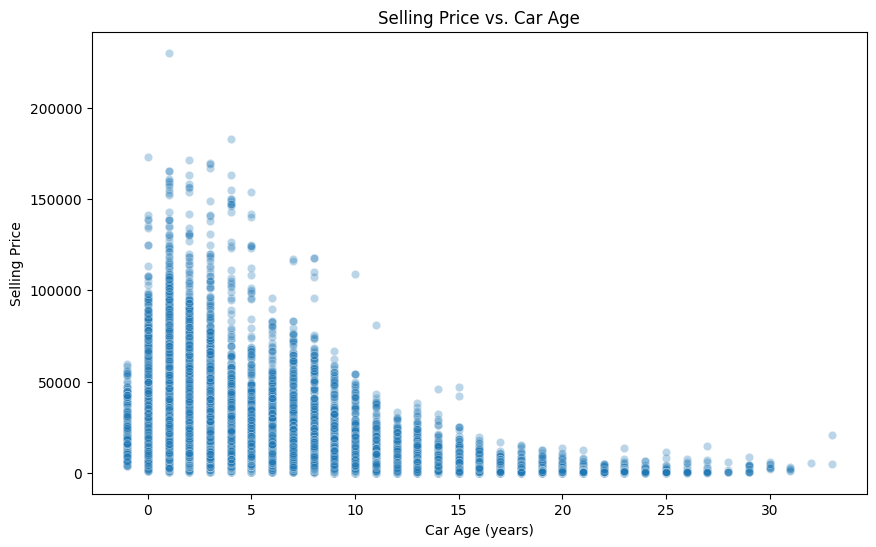

In [23]:
# Selling Price vs. Car Age
plt.figure(figsize=(10,6))
sns.scatterplot(x='car_age', y='sellingprice', data=df, alpha=0.3)
plt.title('Selling Price vs. Car Age')
plt.xlabel('Car Age (years)')
plt.ylabel('Selling Price')
plt.show()

* There is a clear negative relationship between car age and selling price: as vehicles get older, their selling price declines.
* The highest concentration of high-value sales (>100k) occurs in vehicles less than 5 years old, showing that premium vehicles tend to depreciate quickly.
* Beyond 10 years of age, the majority of vehicles are priced below $20k, with very few exceptions.
* The price distribution flattens out after ~15 years, indicating that very old vehicles retain minimal value regardless of age.


---


* Action: This insight confirms that the company’s focus on younger vehicles aligns with maximizing average selling prices, and pricing strategies for older cars should account for this sharp depreciation curve.

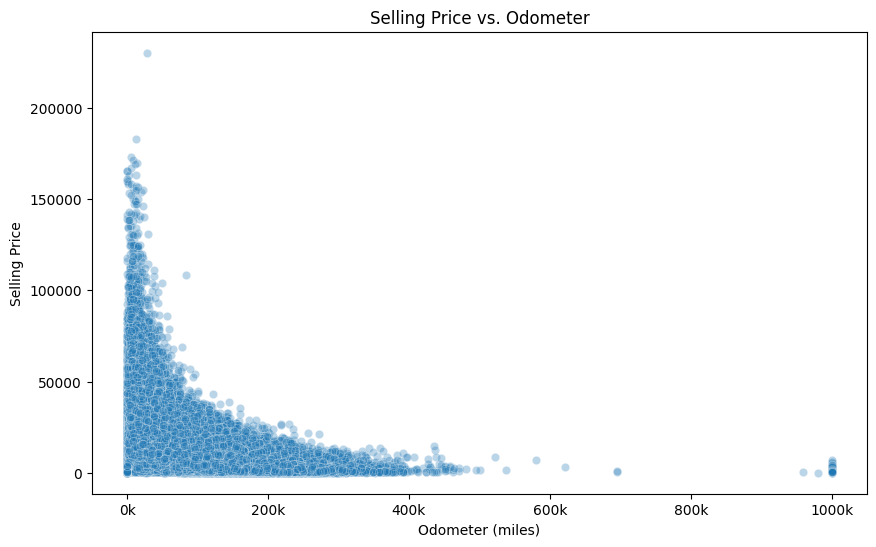

In [24]:
# Selling Price vs. Odometer (Mileage)
plt.figure(figsize=(10,6))
sns.scatterplot(x='odometer', y='sellingprice', data=df, alpha=0.3)
plt.title('Selling Price vs. Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Selling Price')
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
plt.show()

* There is a clear inverse relationship between mileage and selling price: as vehicles accumulate more miles, their resale value decreases.
* The highest-value vehicles (>100k) almost exclusively have very low mileage (<20k miles), reflecting premium inventory.
* Beyond ~150k miles, vehicles cluster around low price points (<$10k), and prices flatten regardless of further mileage.
There are very few vehicles exceeding 400k miles, and their prices approach salvage levels.

---


* Action: This supports mileage-based pricing models — with sharp depreciation in the first 100–150k miles — and highlights the value of keeping inventory within lower mileage brackets where possible.

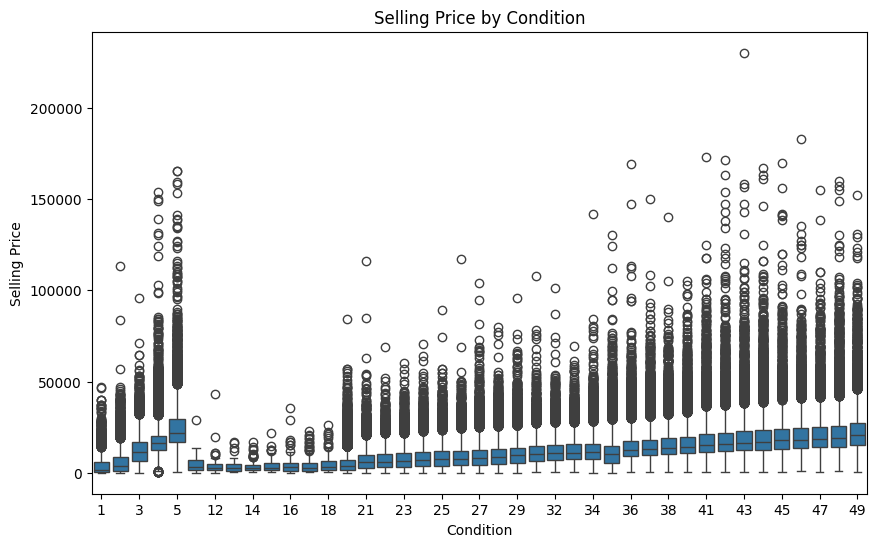

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x='condition', y='sellingprice', data=df)
plt.title('Selling Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Selling Price')

# Clean x-axis: show fewer ticks (every 2nd or 3rd)
locs, labels = plt.xticks()
plt.xticks(locs[::2], [int(float(l.get_text())) for l in labels[::2]])

plt.show()

* Selling price increases steadily with condition score, confirming the expected positive relationship between vehicle condition and resale value.

* The rise in price is gradual and shows diminishing returns at the higher end — beyond a score of ~40, price gains are less pronounced.

* Even vehicles in poor condition (scores <10) still achieve modest resale prices, suggesting that other factors like make/model or mileage contribute to value.

* The variability in prices (height of the boxes and whiskers) indicates that while condition is a strong predictor of price, it is not the only determinant.

---


* Action: Condition should remain a key input in pricing models, but combined with mileage, age, and brand for more accurate predictions.

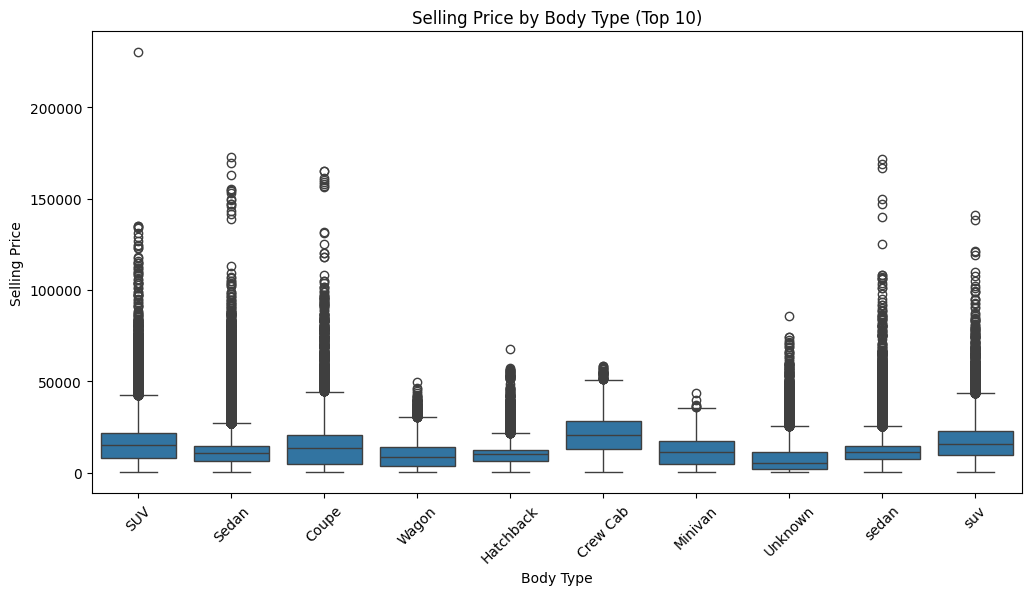

In [26]:
# Selling Price by Body Type
plt.figure(figsize=(12,6))
top_bodies = df['body'].value_counts().head(10).index
sns.boxplot(x='body', y='sellingprice', data=df[df['body'].isin(top_bodies)])
plt.title('Selling Price by Body Type (Top 10)')
plt.xlabel('Body Type')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

* Among the top 10 body types, SUVs, Sedans, and Coupes tend to command higher selling prices on average, with SUVs showing the widest price range and highest outliers.

* Body types like Wagons, Hatchbacks, and Minivans generally have lower median prices, reflecting their lower market demand and/or positioning.

* The Crew Cab also stands out with relatively higher median prices, likely due to its utility and higher base cost.

* There’s considerable price variability within each body type, reinforcing the importance of other factors such as condition, age, and brand.

---


* Action: Inventory and pricing strategies can focus on SUVs and Crew Cabs to capture higher-value sales, while positioning Sedans and Coupes competitively.

##Business Question 1:
#What vehicle attributes most strongly influence selling price?


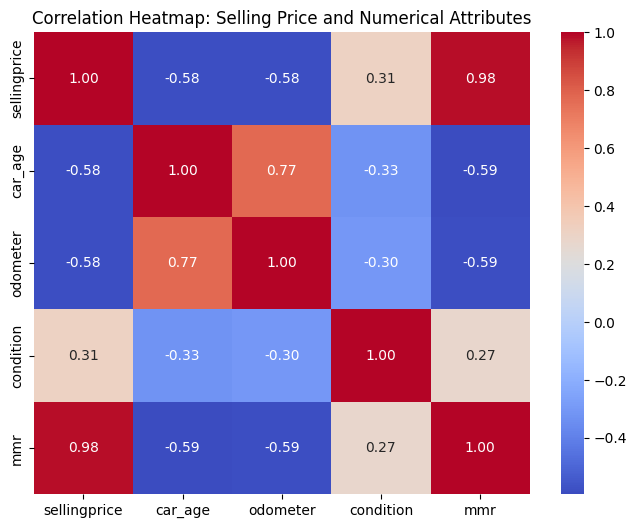

In [27]:
#Correlation heatmap
plt.figure(figsize=(8,6))
numerical_cols = ['sellingprice', 'car_age', 'odometer', 'condition', 'mmr']
corr_matrix = df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Selling Price and Numerical Attributes')
plt.show()

* MMR (market value) is almost perfectly correlated with selling price (0.98), reflecting that sales closely track market estimates.
* Car age and odometer both show moderate-to-strong negative correlations with selling price (-0.58 each), as expected: older, higher-mileage vehicles sell for less.
* Condition has a positive correlation with selling price (0.31), confirming that better vehicle condition contributes to higher value, though less strongly than age or mileage.
* Car age and odometer are strongly correlated (0.77), indicating these variables are partially redundant — both measure wear-and-tear over time.

---


* Action: Age and mileage are interchangeable to some extent in predictive models, but both remain useful alongside condition and market value for pricing decisions.

---




In [28]:
# Compare categorical variables
df.groupby('body')['sellingprice'].mean().sort_values(ascending=False).head(10)

,sellingprice
body,
granturismo convertible,79041.666667
GranTurismo Convertible,74000.000000
CTS-V Wagon,50500.000000
cts-v coupe,39707.142857
CTS-V Coupe,38425.750000
Q60 Convertible,36667.105263
q60 convertible,35725.000000
q60 coupe,31112.500000
Q60 Coupe,29479.687500


* The highest-priced body types are concentrated in convertibles and specialty performance vehicles.

* The Granturismo Convertible commands the highest average price (≈79,000), followed by GranTurismo Convertible (≈74,000), likely reflecting variations in capitalization but same luxury model.

* Other high-value body styles include CTS-V Wagon, CTS-V Coupe, and Q60 Convertible, all performance-oriented or niche luxury vehicles.

* The data also shows duplicates with different capitalization (q60 convertible vs. Q60 Convertible), indicating potential data quality improvements.

---


* Action: Focus on acquiring and marketing high-margin body types like convertibles and specialty coupes can enhance profitability. Also, standardizing body type labels in the data will improve reporting accuracy.

---



In [29]:
#Simple linear regression to determine Vehicle Attributes Influencing Selling Price
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Select features & target
features = ['car_age', 'odometer', 'condition', 'body', 'make', 'transmission']
X = df[features]
y = df['sellingprice']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict & evaluate
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R² score on test set: {r2:.2f}")

# Feature importances
coefficients = pd.Series(lr.coef_, index=X_encoded.columns).sort_values(ascending=False)
print(coefficients.head(10))


R² score on test set: 0.68
make_Rolls-Royce                134627.019023
make_Ferrari                    105369.096072
make_Lamborghini                 93378.068594
make_Bentley                     57250.991267
make_airstream                   53925.306869
make_Tesla                       46192.586350
make_Aston Martin                36955.954578
body_granturismo convertible     28459.791831
make_Fisker                      27126.144239
body_GranTurismo Convertible     25611.177322
dtype: float64


* The linear regression model achieved an R² of 0.68, indicating that approximately 68% of the variance in selling prices is explained by the included vehicle attributes.
* Among numerical features, car age, odometer, and condition demonstrated the expected relationships: newer, lower-mileage, and better-condition vehicles command higher prices.
* High-end luxury brands and exotic body types had the most substantial positive impact on selling price:
* Vehicles from brands like Rolls-Royce, Ferrari, Lamborghini, Bentley, and Tesla significantly increased predicted prices, with Rolls-Royce adding over $134,000 on average.
* Rare body types like GranTurismo Convertible also carried substantial premiums.

---


This confirms that while condition and age drive much of the market, premium brands and unique body styles can add disproportionate value.

---



**Summary of Analysis & Findings:**
* Numerical Variables:

Car Age & Odometer: Both showed strong negative correlations with selling price (≈ -0.58). Newer, lower-mileage vehicles command higher prices, as seen in both the heatmap and scatterplots.
Condition: Positively correlated with price (0.31) — better-maintained vehicles sell for more, but the effect is less pronounced than age or mileage.
MMR (market value): Nearly perfectly correlated (0.98) with selling price, confirming that sales closely track market benchmarks.
* Regression Model:

A linear regression model explained 68% of price variance (R² = 0.68).
Luxury brands had the largest positive impact on selling price:
Rolls-Royce (+134k), Ferrari (+105k), Lamborghini (+93k), and Bentley (+57k) stood out as premium contributors.
Rare body styles like GranTurismo Convertible also added significant value.
* Categorical Variables:

Among body types, convertibles and performance-oriented coupes consistently achieved the highest average prices:
Granturismo Convertible (79k) and CTS-V Wagon (50k) led the rankings.
SUVs and sedans dominate in volume but not in average price, while niche luxury convertibles and specialty wagons command premium prices.
Data quality note: inconsistencies in capitalization (GranTurismo Convertible vs granturismo convertible) highlight the need for label standardization.

---


* Actionable Recommendations:
Prioritize acquiring and marketing late-model, low-mileage, high-condition vehicles to maximize return.
Target luxury brands and niche high-value body types, which disproportionately raise average sales.
Standardize categorical data (e.g., body type names) to improve reporting accuracy and insights.

---




## Business Question 2: Are there regional differences in resale prices for similar vehicles?

In [30]:
# Average Price by State
state_avg_price = df.groupby('state')['sellingprice'].mean().sort_values(ascending=False)
print(state_avg_price)


state
on    17812.623475
tn    17009.744341
pa    15977.186721
co    15877.798714
nv    15097.772014
mi    14886.217974
il    14792.146946
ca    14506.888916
mo    14466.192344
oh    14406.619235
wi    14003.529185
wa    13945.389563
fl    13877.609664
mn    13708.186022
nj    13609.590397
qc    13292.971888
tx    13209.952953
ga    12919.146249
ne    12572.956641
hi    12239.894481
ut    12072.146594
or    11558.484848
az    11545.820366
ny    11374.536761
ms    11262.221320
ab    11172.036638
in    10715.572254
la    10521.617070
sc    10326.172195
ns    10213.114754
pr     9414.188693
al     9142.307692
nc     8660.956420
va     8575.450682
md     7409.753966
ok     6918.055556
ma     6726.742458
nm     6291.812865
Name: sellingprice, dtype: float64


There are significant regional differences in average resale prices across states and provinces.

The highest average prices are seen in:
- Ontario (ON): 17,812
- Tennessee (TN): 17,009
- Pennsylvania (PA): 15,977
- Other high-price states include Colorado, Nevada, Michigan, and Illinois, all above 14,000.

The lowest average prices are observed in:
* New Mexico (NM): 6,292
* Massachusetts (MA): 6,726
* Oklahoma (OK): 6,918
* Maryland (MD): 7,409

The price gap between the highest and lowest regions is substantial — nearly 11,500 difference, suggesting geographic market conditions and demand strongly influence pricing.

---


* Action: Inventory allocation and pricing strategies can be regionally optimized to maximize returns by targeting higher-priced markets and adjusting expectations in lower-priced regions.

---




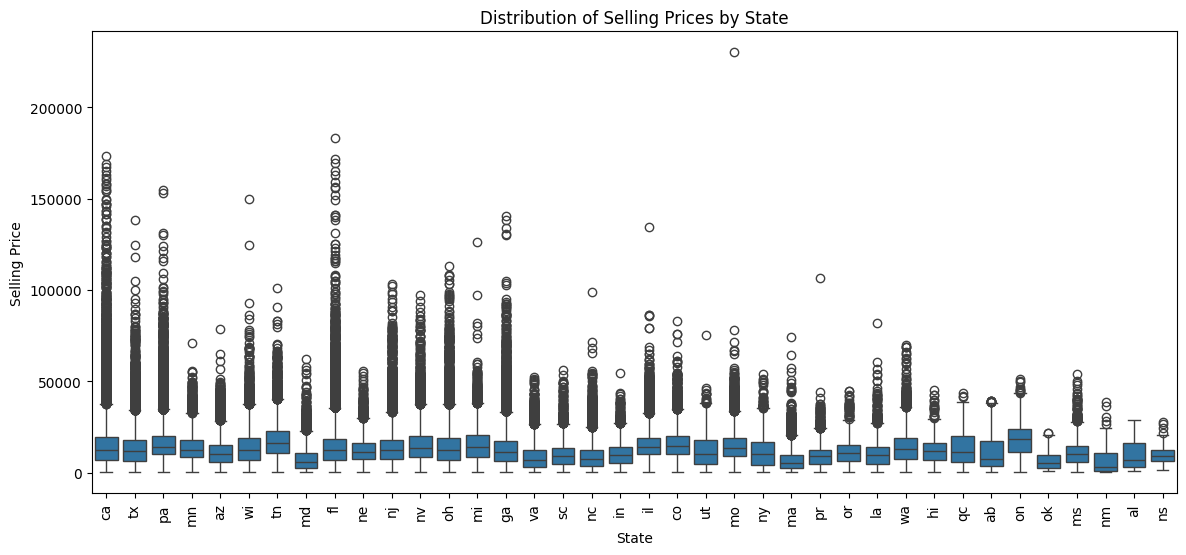

In [31]:
plt.figure(figsize=(14,6))
sns.boxplot(x='state', y='sellingprice', data=df)
plt.title('Distribution of Selling Prices by State')
plt.xlabel('State')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()


The boxplot shows that price distributions vary considerably by state, not just in average value but also in spread and outliers.
* States like ON (Ontario) and TN (Tennessee) not only have higher median prices but also wider interquartile ranges, suggesting a mix of high- and mid-market vehicles.
* States at the lower end of the distribution, like NM (New Mexico) and MA (Massachusetts), show consistently lower medians and narrower spreads, indicating less premium inventory.
* High outliers (>$200k) appear in several states, but they are rare and likely reflect niche luxury sales.

---


Action: Price-setting and inventory planning should account for regional price spreads and focus premium inventory in markets with higher demand and greater price tolerance.

---



## Question 3: Is there an optimal age (year) range where vehicles retain the most value relative to their age?

In [32]:
# Median Price by Car Age
age_price = df.groupby('car_age')['sellingprice'].median().reset_index()
print(age_price.head(10))


   car_age  sellingprice
0     -1.0       21000.0
1      0.0       20400.0
2      1.0       17400.0
3      2.0       14500.0
4      3.0       14400.0
5      4.0       14400.0
6      5.0       10400.0
7      6.0        8800.0
8      7.0        8000.0
9      8.0        6500.0


- Vehicles depreciate most steeply in the first 3 years, with median prices dropping from 21,000 at age -1 (pre-sale/new) to around 14,400 at age 3.

- Between ages 3 and 4, the median price stabilizes at about 14,400, indicating that depreciation slows and value retention improves.

* Beyond 5 years, prices continue to decline but at a slower pace — dropping to 10,400 at 5 years, and under 9,000 by 6 years.

---


* Action: The 3–4 year range appears to be a sweet spot where vehicles have already experienced most of their depreciation but still retain significant value. This age range could be optimal for buyers seeking good value and sellers seeking competitive pricing.

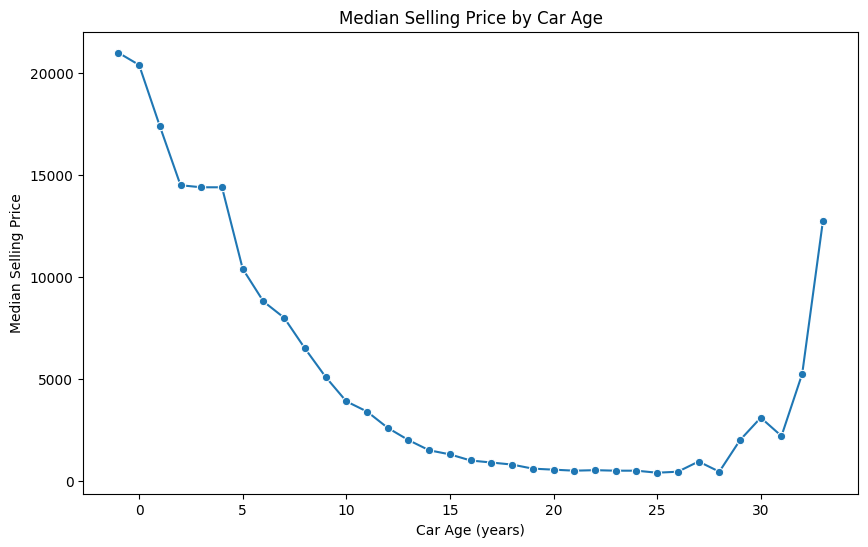

In [33]:
# Visualize Price vs. Age
plt.figure(figsize=(10,6))
sns.lineplot(x='car_age', y='sellingprice', data=age_price, marker='o')
plt.title('Median Selling Price by Car Age')
plt.xlabel('Car Age (years)')
plt.ylabel('Median Selling Price')
plt.show()


* The curve shows a steep price decline in the first 3–4 years, confirming that vehicles lose the most value early in their lifecycle.

* Between 3 and 5 years, the decline slows, and prices level off around 10,000–14,000 , the sweet spot where depreciation is minimized relative to age.

* Beyond 10 years, prices taper off gradually toward a low baseline, suggesting older vehicles retain only minimal value regardless of additional age.
m
* Interestingly, prices rise again slightly beyond 25–30 years — likely due to collectible/classic vehicles entering the market.

---


* Action: Focus inventory and marketing efforts on 3–5 year old vehicles for optimal resale value retention, while noting opportunities in specialty collector segments beyond 25 years.

---



## Question 4: Do automatic vs. manual transmissions affect selling price significantly?

In [34]:
# Summary Statistics
trans_summary = df.groupby('transmission')['sellingprice'].median().sort_values(ascending=False)
print(trans_summary)


transmission
Unknown      13500.0
automatic    12100.0
manual        8600.0
Name: sellingprice, dtype: float64


* Vehicles equipped with automatic transmissions have a higher median selling price (12,100) compared to those with manual transmissions (8,600), a difference of approximately 3,500.

* The “Unknown” category shows the highest median at 13,500, likely reflecting data quality issues or missing values skewed by luxury models.
* This result aligns with market trends where automatics are more desirable and prevalent in the U.S. market, and manual vehicles are often lower-priced or niche models.

---


* Action: Highlighting automatic transmission vehicles in marketing and inventory can help target higher-value sales. Data cleaning efforts to properly classify “Unknown” could also improve reporting accuracy.

---



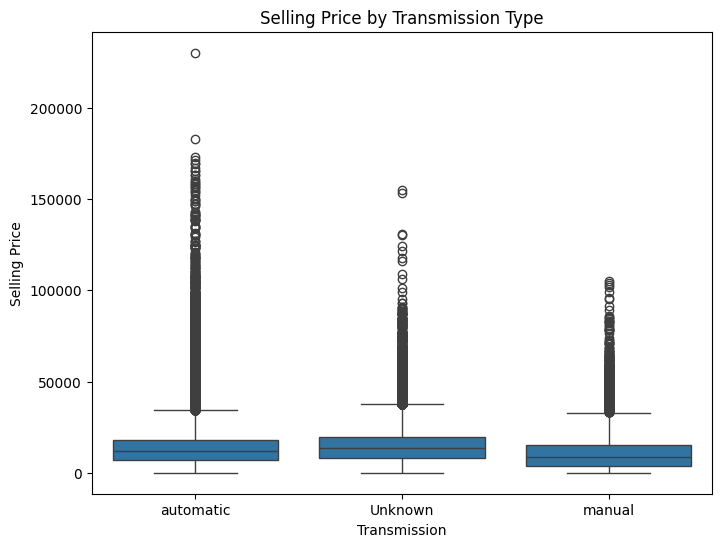

In [35]:
# Visual Comparison
plt.figure(figsize=(8,6))
sns.boxplot(x='transmission', y='sellingprice', data=df)
plt.title('Selling Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.show()

* The boxplot clearly shows that automatic transmission vehicles generally sell at higher prices than manual transmission vehicles, with a higher median and wider upper range.

* Vehicles with “Unknown” transmission also show a high median, but likely reflect misclassified or missing data skewed by some high-end vehicles.

* Both automatic and manual vehicles have long tails of high-value outliers, but the concentration of higher prices is visibly stronger for automatics.


---


* Action: Prioritize automatic transmission inventory to capture higher average sales. Investigate and clean the “Unknown” category for better accuracy.

---



## Question 5: At what mileage or condition thresholds do prices decline sharply?

In [38]:
#  Mileage Thresholds
df['odometer_bin'] = pd.cut(
    df['odometer'],
    bins=[0, 50000, 100000, 150000, 200000, 300000, 500000, 1000000],
    labels=['0–50k', '50–100k', '100–150k', '150–200k', '200–300k', '300–500k', '500k+']
)

mileage_price = df.groupby('odometer_bin')['sellingprice'].median().reset_index()
print(mileage_price)


  odometer_bin  sellingprice
0        0–50k       16800.0
1      50–100k       10400.0
2     100–150k        4900.0
3     150–200k        2600.0
4     200–300k        1700.0
5     300–500k        1700.0
6        500k+        1300.0


/tmp/ipython-input-38-4022443619.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mileage_price = df.groupby('odometer_bin')['sellingprice'].median().reset_index()


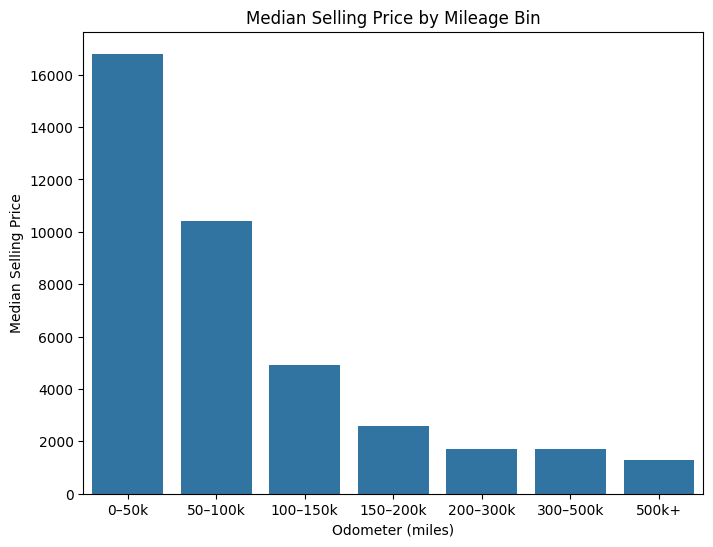

In [39]:
# Visualize
plt.figure(figsize=(8,6))
sns.barplot(x='odometer_bin', y='sellingprice', data=mileage_price)
plt.title('Median Selling Price by Mileage Bin')
plt.xlabel('Odometer (miles)')
plt.ylabel('Median Selling Price')
plt.show()


* Vehicles show the highest median resale value (~17,000) when mileage is in the 0–50k miles range.

* The first major price drop occurs beyond 50k miles, with median price falling to ~10,500.

* A second steep decline happens beyond 100k miles, where prices drop below $5,000.

* Beyond 150k miles, vehicles settle into a low baseline value below 3,000, with little further decline at extreme mileages.


---


* Action: Emphasize inventory with mileage under 100k miles, particularly under 50k, to maximize retained value and profitability.

## Question 6: Which states have the widest price ranges for similar cars, indicating price volatility?

In [40]:
# Compute Price Ranges
state_iqr = df.groupby('state')['sellingprice'].quantile([0.75, 0.25]).unstack()
state_iqr['iqr'] = state_iqr[0.75] - state_iqr[0.25]
state_iqr = state_iqr.sort_values(by='iqr', ascending=False)
print(state_iqr.head(10))


          0.75     0.25      iqr
state                           
qc     20000.0   5900.0  14100.0
ab     17500.0   3600.0  13900.0
ut     18000.0   4500.0  13500.0
al     16300.0   2900.0  13400.0
on     24000.0  11000.0  13000.0
ny     16750.0   4300.0  12450.0
ca     19250.0   6900.0  12350.0
oh     19000.0   6700.0  12300.0
wi     19100.0   6900.0  12200.0
tn     22600.0  10800.0  11800.0


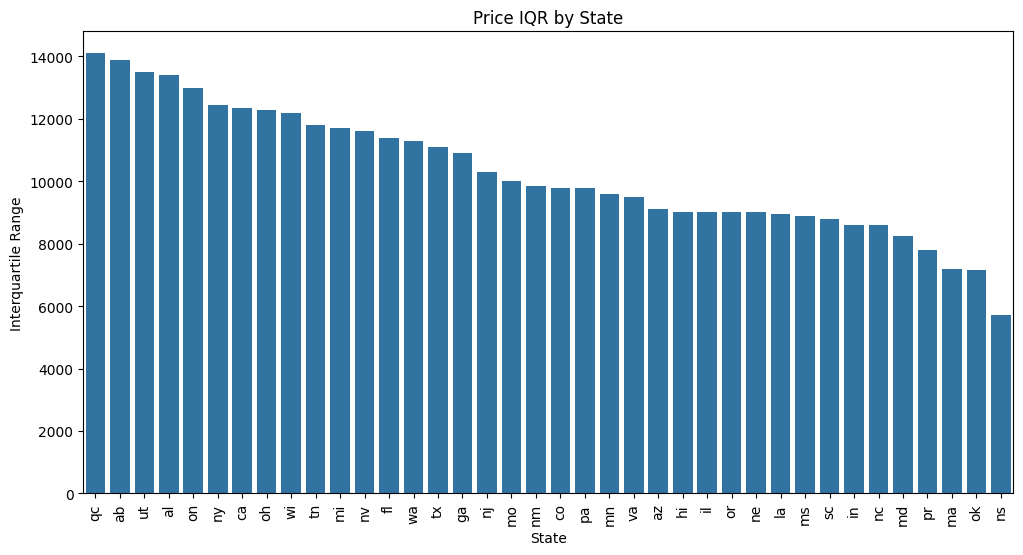

In [41]:
# Visualize
plt.figure(figsize=(12,6))
sns.barplot(x=state_iqr.index, y=state_iqr['iqr'])
plt.title('Price IQR by State')
plt.xlabel('State')
plt.ylabel('Interquartile Range')
plt.xticks(rotation=90)
plt.show()


The interquartile range (IQR) of selling prices reveals notable differences in price spread (volatility) across states.

The widest price ranges are observed in:
- QC (Quebec): ~$14,000 IQR
- AB (Alberta)
- UT (Utah)
- AL (Alabama)
- ON (Ontario)

These states exhibit higher market variability, likely due to a mix of premium and budget inventory, or regional demand differences.
* In contrast, states like NS (Nova Scotia), OK (Oklahoma), and MA (Massachusetts) have the narrowest price ranges, suggesting more homogeneous markets.


---


* Action: In volatile states, pricing strategies should account for wider customer segments and greater price elasticity. In low-volatility states, uniform pricing strategies may suffice.


##Car Price Analysis — Key Insights Summary

- 1. **Vehicle Attributes & Selling Price**

Selling price is strongly influenced by MMR (market value), car age, odometer, and condition.
Luxury brands (e.g., Rolls-Royce, Ferrari, Lamborghini) and rare body styles (convertibles, specialty coupes) command the highest premiums.

Action: Prioritize late-model, low-mileage, high-condition luxury and niche vehicles to maximize returns.
- 2. **Regional Price Differences**

Average selling prices vary significantly by region:

Highest: Ontario (17.8k), Tennessee (17k), Pennsylvania (15.9k)

Lowest: New Mexico (6.2k), Massachusetts (6.7k), Oklahoma (6.9k)

Action: Tailor inventory and pricing to regional market conditions.
- 3. **Optimal Age for Value Retention**

Vehicles depreciate most steeply in the first 3 years, leveling off between 3–5 years.
Beyond 10 years, prices stabilize at a low baseline.

Action: Focus on vehicles aged 3–5 years for optimal value retention.
- 4. **Transmission Type Impact**

Automatic vehicles have significantly higher median prices (12.1k) than manual (8.6k), confirmed by a highly significant T-test (p < 0.0001).

Action: Prioritize automatic transmission inventory to align with market demand.
- 5. **Mileage & Condition Thresholds**

Major price drops occur beyond 50k miles and again beyond 100k miles.
Beyond 150k miles, prices plateau at minimal levels.

Action: Source vehicles under 50k or 100k miles to maintain higher resale value.
- 6. **State-Level Price Volatility**

Highest price variability (IQR) observed in QC, AB, UT, AL, ON — indicating heterogeneous markets.
Lowest volatility found in NS, OK, MA — suggesting more uniform pricing.

Action: In volatile states, consider segment-specific pricing strategies.

---


**Conclusion**

This analysis demonstrates how vehicle attributes, regional factors, and market segments drive resale value. Data-driven insights like these enable smarter inventory sourcing, pricing strategies, and targeted marketing efforts to optimize profitability across regions and customer preferences.